# 6.5 Unsupervised Machine Learning - Clustering

## Table of contents:
### 1.Importing Libraries
### 2. Importing Data
### 3. Data Preparation
#### 3.1 Removing categorical variables
#### 3.2 Handling Missing Values
#### 3.3 Remove extreme values
#### 3.4 Standardize Data
### 4. The elbow technique
### 5. K-means clustering
### 6. Visualizations Analysis
#### 6.1 Primary Energy Consumption and CO2 Emissions
#### 6.2 Primary Energy Consumption per capita and CO2 emissions per capita
#### 6.3 Primary Energy Consumption per GDP and CO2 Emissions per GDP
#### 6.4 GDP and CO2 emissions
#### 6.5 Population and CO2 Emissions
#### 6.6 Average CO2 Emissions and Total CO2 Emissions
#### 6.7 Primary Energy Consumption and Population
### 7. Descriptive Statistics

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

# 2. Importing Data

In [3]:
# Create a path to the root directory for this project

path = r'C:\Users\osoty\Desktop\CareerFoundry Data Analytics\Data Immersion\Achievement 6\Global CO2 Emissions Analysis'

In [4]:
# Import the dataframe 

df_co2 = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'emissions_clean_recent_only_countries_flags.pkl'))

In [5]:
# Print the first 20 rows

df_co2.head(20)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,co2_category,co2_per_capita_category,average_co2_emission
0,Afghanistan,2012,AFG,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,...,0.004,0.040,0.009,0.015,0.000,0.005,0.057,Low,Low,10.2639
1,Afghanistan,2013,AFG,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,...,0.004,0.039,0.009,0.016,0.000,0.005,0.048,Low,Low,10.2639
2,Afghanistan,2014,AFG,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,...,0.005,0.038,0.009,0.016,0.000,0.004,0.044,Low,Low,10.2639
3,Afghanistan,2015,AFG,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,...,0.005,0.037,0.009,0.017,0.000,0.004,0.056,Low,Low,10.2639
4,Afghanistan,2016,AFG,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,...,0.005,0.036,0.009,0.018,0.000,0.005,0.048,Low,Low,10.2639
5,Afghanistan,2017,AFG,35643420.0,6.875280e+10,0.045,0.001,9.868,0.800,8.827,...,0.006,0.035,0.009,0.019,0.000,0.004,0.050,Low,Low,10.2639
6,Afghanistan,2018,AFG,36686788.0,6.759497e+10,0.057,0.002,10.818,0.950,9.628,...,0.006,0.035,0.008,0.019,0.000,0.004,0.054,Low,Low,10.2639
7,Afghanistan,2019,AFG,37769496.0,NaN,0.038,0.001,11.082,0.264,2.436,...,0.006,0.034,0.008,0.020,0.000,0.003,0.055,Low,Low,10.2639
8,Afghanistan,2020,AFG,38972236.0,NaN,0.061,0.002,11.682,0.600,5.416,...,0.007,0.033,0.008,0.021,0.000,0.003,0.065,Low,Low,10.2639
9,Afghanistan,2021,AFG,40099460.0,NaN,0.012,0.000,11.874,0.192,1.647,...,0.007,0.032,0.008,0.022,0.000,0.003,0.063,Low,Low,10.2639


In [6]:
# Check the size of the dataframe

df_co2.shape

(2200, 44)

# 3. Data Preparation

#### Before running the clustering algorithm, it is important to prepare the data.

## 3.1 Removing categorical variables

#### K-means clustering can't handle categorical variables. Therefore, I'm going to create a new dataframe withouth these variables.

In [7]:
# Select only the numeric columns in the dataframe

df_co2_clustering = df_co2.select_dtypes(include=np.number)

In [8]:
# Display data type of each variable in the dataframe

df_co2_clustering.dtypes

year                                     int64
population                             float64
gdp                                    float64
cement_co2                             float64
cement_co2_per_capita                  float64
co2                                    float64
co2_growth_abs                         float64
co2_growth_prct                        float64
co2_per_capita                         float64
co2_per_gdp                            float64
coal_co2                               float64
coal_co2_per_capita                    float64
cumulative_cement_co2                  float64
cumulative_co2                         float64
cumulative_coal_co2                    float64
cumulative_flaring_co2                 float64
cumulative_gas_co2                     float64
cumulative_oil_co2                     float64
energy_per_capita                      float64
energy_per_gdp                         float64
flaring_co2                            float64
flaring_co2_p

#### This removed all categorical variables except for "year" which has int64 as datatype, but is considered a categorical variable for our analysis. Therefore, I'm also going to remove it. 

In [9]:
# Drop the "year" column

df_co2_clustering = df_co2_clustering.drop(['year'], axis=1)

In [10]:
# Check the output

df_co2_clustering.head()

,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,...,share_global_cumulative_cement_co2,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,average_co2_emission
0,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,0.329,0.170,3.125,...,0.007,0.009,0.004,0.040,0.009,0.015,0.0,0.005,0.057,10.2639
1,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,0.293,0.147,3.327,...,0.007,0.009,0.004,0.039,0.009,0.016,0.0,0.005,0.048,10.2639
2,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,0.280,0.143,3.706,...,0.006,0.010,0.005,0.038,0.009,0.016,0.0,0.004,0.044,10.2639
3,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,0.290,0.156,2.843,...,0.006,0.010,0.005,0.037,0.009,0.017,0.0,0.004,0.056,10.2639
4,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,0.262,0.141,2.879,...,0.006,0.010,0.005,0.036,0.009,0.018,0.0,0.005,0.048,10.2639


#### Now all categorical variables have been removed successfully.

## 3.2  Handling Missing Values

#### We already observed in the previous scripts, that there are several missing values in our dataframe.

In [11]:
# Check for missing values

df_co2_clustering.isnull().sum()

population                                0
gdp                                    1052
cement_co2                               17
cement_co2_per_capita                    17
co2                                       0
co2_growth_abs                           10
co2_growth_prct                           0
co2_per_capita                            0
co2_per_gdp                            1045
coal_co2                                  0
coal_co2_per_capita                       0
cumulative_cement_co2                    17
cumulative_co2                            0
cumulative_coal_co2                       0
cumulative_flaring_co2                    0
cumulative_gas_co2                        0
cumulative_oil_co2                        0
energy_per_capita                       360
energy_per_gdp                         1052
flaring_co2                               0
flaring_co2_per_capita                    0
gas_co2                                   0
gas_co2_per_capita              

#### There are quite a lot of missing values for all variables in connection with gdp. We could use median to impute values, however the percentage of missing values is very high for those columns. Also, the purpose of clustering is to let the algorithm cluster our datapoints and imputing a median to all those variables would create similarities between values which in reality might not even be there. Therefore, I decided to just remove the observations with missing values.

In [12]:
# Remove missing values

df_co2_clustering = df_co2_clustering[df_co2_clustering['gdp'].isnull() == False]

In [13]:
# Check again for missing values

df_co2_clustering.isnull().sum()

population                             0
gdp                                    0
cement_co2                             0
cement_co2_per_capita                  0
co2                                    0
co2_growth_abs                         0
co2_growth_prct                        0
co2_per_capita                         0
co2_per_gdp                            0
coal_co2                               0
coal_co2_per_capita                    0
cumulative_cement_co2                  0
cumulative_co2                         0
cumulative_coal_co2                    0
cumulative_flaring_co2                 0
cumulative_gas_co2                     0
cumulative_oil_co2                     0
energy_per_capita                      0
energy_per_gdp                         0
flaring_co2                            0
flaring_co2_per_capita                 0
gas_co2                                0
gas_co2_per_capita                     0
oil_co2                                0
oil_co2_per_capi

#### Now we don't have any missing values left. The code was only applied to the "gdp" column because I knew that dropping NaN observations from this variable would affect also the other variables.

In [14]:
# Check the size of the dataframe after removing the missing values

df_co2_clustering.shape

(1148, 39)

#### Around 1000 observations have been removed, but at least we don't have any missing values now.

## 3.3 Remove extreme values

C:\Users\osoty\AppData\Local\Temp\ipykernel_16948\994567671.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_clustering['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

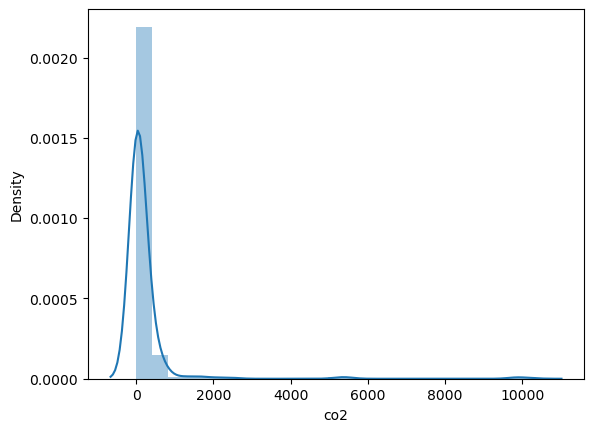

In [15]:
# Shows extreme values for the "co2" column

sns.distplot(df_co2_clustering['co2'], bins=25)

#### We already learned in the previous scripts that there are some outliers that could influence our analysis. Therefore, I'm going to remove the extreme values.

In [16]:
# Remove extreme values

df_co2_clustering_filter = df_co2_clustering[df_co2_clustering['co2'] <= 2000]

C:\Users\osoty\AppData\Local\Temp\ipykernel_16948\337280684.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_co2_clustering_filter['co2'], bins=25)


<AxesSubplot:xlabel='co2', ylabel='Density'>

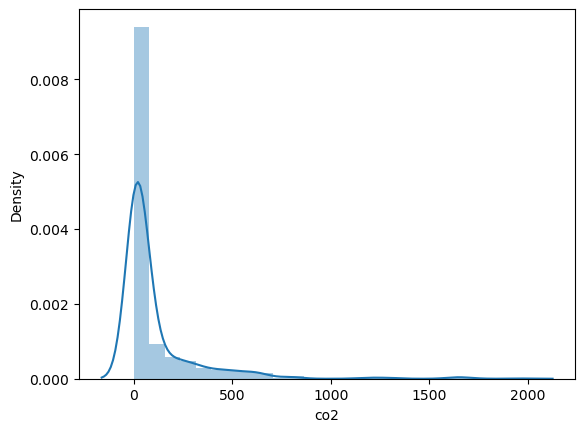

In [17]:
# Check the distribution after removing the outliers

sns.distplot(df_co2_clustering_filter['co2'], bins=25)

#### This distribution looks better than before.

In [18]:
# Check the size of the dataframe after removing the extreme values

df_co2_clustering_filter.shape

(1128, 39)

#### After removing the extreme values, the dataframe has fewer 20 observations than before.

## 3.4 Standardize Data

#### The scales in our variables are very different, so it is crucial to standardize data before performing a K-means clustering. I will use the standardscaler function to standardize all values in the dataframe.

In [19]:
# Define a scaling object

scaler = StandardScaler()

In [20]:
# Create an object containing an array of standardized data

df_co2_clustering_standard = scaler.fit_transform(df_co2_clustering_filter)

In [21]:
# Check the output

df_co2_clustering_standard

array([[ 0.04826509, -0.45400904, -0.47717965, ..., -0.38290941,
        -0.42548938, -0.43007077],
       [ 0.06743932, -0.44897817, -0.47624766, ..., -0.38290941,
        -0.43887508, -0.43007077],
       [ 0.08840238, -0.44720023, -0.47717965, ..., -0.38378415,
        -0.44482429, -0.43007077],
       ...,
       [-0.23743576, -0.5042351 , -0.41966259, ..., -0.38728309,
        -0.4715957 , -0.42585064],
       [-0.23211209, -0.5029388 , -0.41859745, ..., -0.38728309,
        -0.4715957 , -0.42585064],
       [-0.22674037, -0.50192979, -0.40674787, ..., -0.38728309,
        -0.4611846 , -0.42585064]])

#### Great! Now we can use this array to decide how many clusters to use.

# 4. The elbow technique

#### With the help of the elbow technique we can decide how many clusters we need for our cluster analysis. Let's create 10 different sets, containing from 1 to 10 clusters.

In [22]:
# Set the range of clusters and a kmeans object containing the range assigned above

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [23]:
# Now let's use our standardized data to assign a score to every combination of clusters

score = [kmeans[i].fit(df_co2_clustering_standard).score(df_co2_clustering_standard) for i in range(len(kmeans))]

score

C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

[-43992.00000000001,
 -29313.599466723823,
 -23677.4122762596,
 -20658.489813690994,
 -18155.93625855576,
 -16821.941420428324,
 -15250.085961981533,
 -14072.315307195437,
 -12930.780180959078]

#### In this state the score is not very useful. Let's plot the elbow curve using scores.

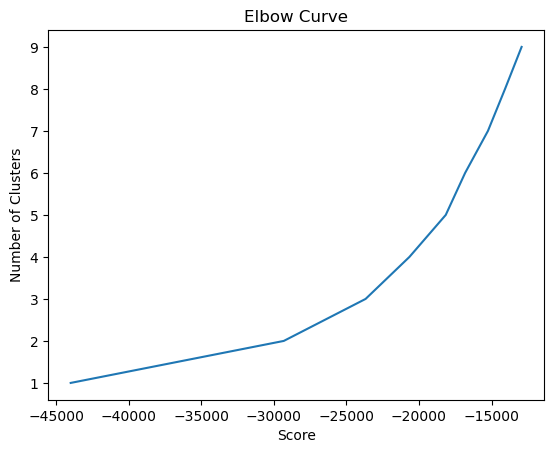

In [24]:
# Plot the elbow curve using PyLab

pl.plot(score,num_cl)
pl.xlabel('Score')
pl.ylabel('Number of Clusters')
pl.title('Elbow Curve')
pl.show()

#### The curve begins to flatten out after 3 clusters which means that the optimal number of clusters for our data is 3.

# 5. K-means clustering

#### Now our entire set of datapoints can be split into 3 clusters!

In [25]:
# Input the decided number of clusters into the kmeans object

kmeans = KMeans(n_clusters = 3)

In [26]:
# Fit the kmeans object with our standardized data

kmeans.fit(df_co2_clustering_standard)

C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

#### The algorithm created clusters based on our standardized data. Next step is to create a new column in our original dataframe, so we can know to which cluster every observation is assigned to.

In [27]:
# Create the new column

df_co2_clustering_filter['cluster_number'] = kmeans.fit_predict(df_co2_clustering_standard)

C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\osoty\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\osoty\AppData\Local\Temp\ipykernel_16948\1029599237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_clustering_filter['cluster_number'] = kmeans.fit_predict(df_co2_clustering_standard)


In [28]:
# Check the dataframe to see the new column

df_co2_clustering_filter.head(10)

,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_per_capita,co2_per_gdp,coal_co2,...,share_global_cumulative_co2,share_global_cumulative_coal_co2,share_global_cumulative_flaring_co2,share_global_cumulative_gas_co2,share_global_cumulative_oil_co2,share_global_flaring_co2,share_global_gas_co2,share_global_oil_co2,average_co2_emission,cluster_number
0,30466484.0,5.916690e+10,0.029,0.001,10.035,-1.803,-15.230,0.329,0.170,3.125,...,0.009,0.004,0.040,0.009,0.015,0.000,0.005,0.057,10.2639,0
1,31541216.0,6.299370e+10,0.036,0.001,9.251,-0.785,-7.820,0.293,0.147,3.327,...,0.009,0.004,0.039,0.009,0.016,0.000,0.005,0.048,10.2639,0
2,32716214.0,6.434611e+10,0.029,0.001,9.170,-0.080,-0.867,0.280,0.143,3.706,...,0.010,0.005,0.038,0.009,0.016,0.000,0.004,0.044,10.2639,0
3,33753500.0,6.278339e+10,0.041,0.001,9.791,0.621,6.770,0.290,0.156,2.843,...,0.010,0.005,0.037,0.009,0.017,0.000,0.004,0.056,10.2639,0
4,34636212.0,6.429743e+10,0.076,0.002,9.068,-0.723,-7.389,0.262,0.141,2.879,...,0.010,0.005,0.036,0.009,0.018,0.000,0.005,0.048,10.2639,0
5,35643420.0,6.875280e+10,0.045,0.001,9.868,0.800,8.827,0.277,0.144,3.448,...,0.011,0.006,0.035,0.009,0.019,0.000,0.004,0.050,10.2639,0
6,36686788.0,6.759497e+10,0.057,0.002,10.818,0.950,9.628,0.295,0.160,3.847,...,0.011,0.006,0.035,0.008,0.019,0.000,0.004,0.054,10.2639,0
10,2892191.0,2.885538e+10,1.039,0.359,4.850,-0.465,-8.742,1.677,0.168,0.627,...,0.018,0.009,0.000,0.008,0.031,0.000,0.000,0.027,5.0324,0
11,2887019.0,2.914264e+10,1.129,0.391,5.287,0.437,9.019,1.831,0.181,0.795,...,0.018,0.009,0.000,0.008,0.031,0.000,0.001,0.029,5.0324,0
12,2884100.0,2.967564e+10,1.045,0.362,6.000,0.712,13.469,2.080,0.202,1.029,...,0.018,0.009,0.000,0.008,0.031,0.003,0.001,0.033,5.0324,0


In [29]:
# Check the distribution of values for the new column

df_co2_clustering_filter['cluster_number'].value_counts()

0    911
2    195
1     22
Name: cluster_number, dtype: int64

#### The majority of datapoints seems to be gathered into one big cluster, while the second clusters contains less observations and the third cluster only 20 observations. This is not surprising and reflects the nature of the dataset since we have already seen that three countries (China, United States and India) are like a group of their own in comparison to other countries. 

# 6. Visualizations Analysis

#### Now that the data was divided into three clusters, all that is left to do is to analyze different visualizations, using our clusters as hue labels. First I'm going to look into the relationship between two variables that we already investigated multiple times: primary energy consumption and CO2 emissions.

## 6.1 Primary Energy Consumption and CO2 Emissions

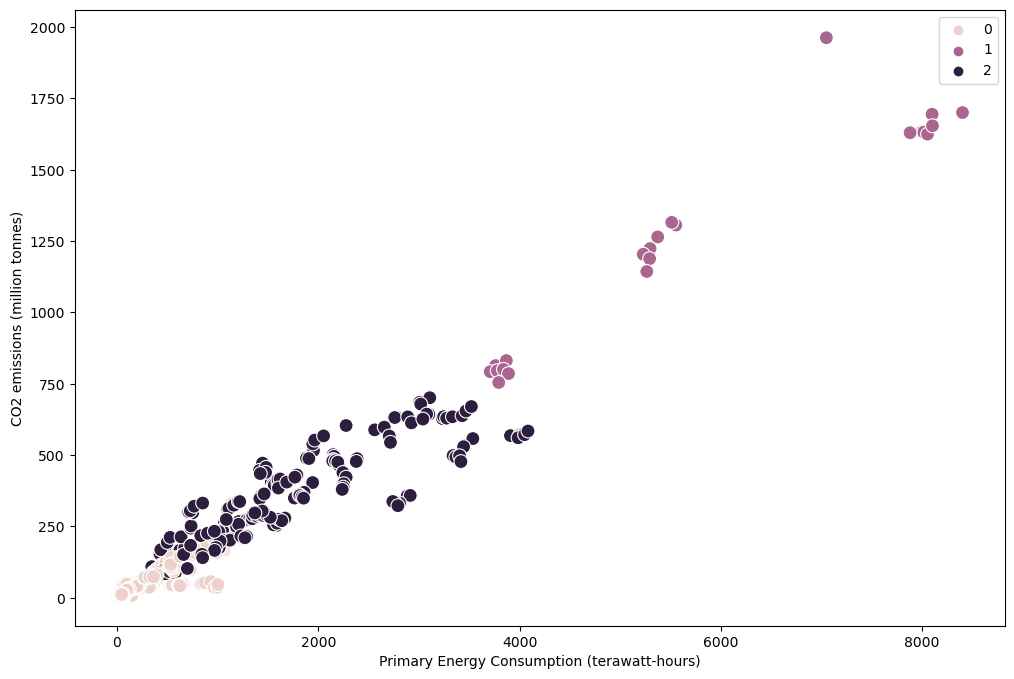

In [30]:
# Create a scatterplot for primary energy consumption and CO2 emissions

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_co2_clustering_filter['primary_energy_consumption'], y=df_co2_clustering_filter['co2'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Primary Energy Consumption (terawatt-hours)') # Label x-axis.
plt.ylabel('CO2 emissions (million tonnes)') # Label y-axis.
plt.show()

#### To simplify from now on we will call:
* cluster 0 as light pink,
* cluster 1 as purple
* cluster 2 as dark purple,

#### It seems like both variables had an impact on the clustering process.The dark purple cluster contains the least observations and is clearly separated the other two clusters which makes them basically some kind of outliers.  
* dark purple cluster: contains the extreme high values for both, CO2 emissions and primary energy consumption. 
* purple cluster: contains medium high values for CO2 emissions and primary energy consumption. 

#### The light pink cluster which contains most of the observations is located at lower values of primary energy consumption and co2 emissions and is closer to the purple cluster and overlapping in some areas.

* light pink cluster: contains most of the observations and has the lowest values for both, CO2 emissions and primary energy consumption

#### The clustering makes sense since we have seen with the help of histograms before that there are some really high values even after removing the highest outliers

#### Next, let's try to plot co2 emissions per capita and energy consumption per capita together.

## 6.2 Primary Energy Consumption per capita and CO2 emissions per capita

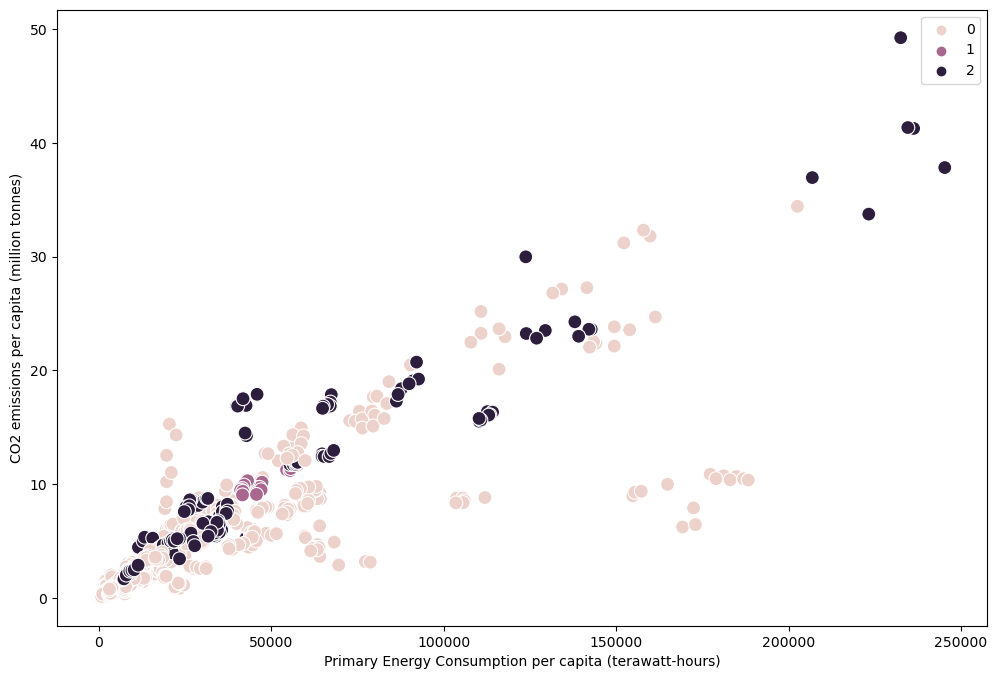

In [31]:
# Create a scatterplot for primary energy consumption per capita and CO2 emissions per capita

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_co2_clustering_filter['energy_per_capita'], y=df_co2_clustering_filter['co2_per_capita'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Primary Energy Consumption per capita (terawatt-hours)') # Label x-axis.
plt.ylabel('CO2 emissions per capita (million tonnes)') # Label y-axis.
plt.show()

#### The clusters in this plot are not as clearly separated as the clusters in the plot for the total CO2 emissions. Only the datapoints for the dark purple cluster are aggregated all together. The datapoints for the light pink and purple cluster are all over the place making it impossible to see a clear trend. 
#### Let's create a plot between primary energy consumption per GDP and  CO2 emissions per GDP.

## 6.3 Primary Energy Consumption per GDP and CO2 Emissions per GDP

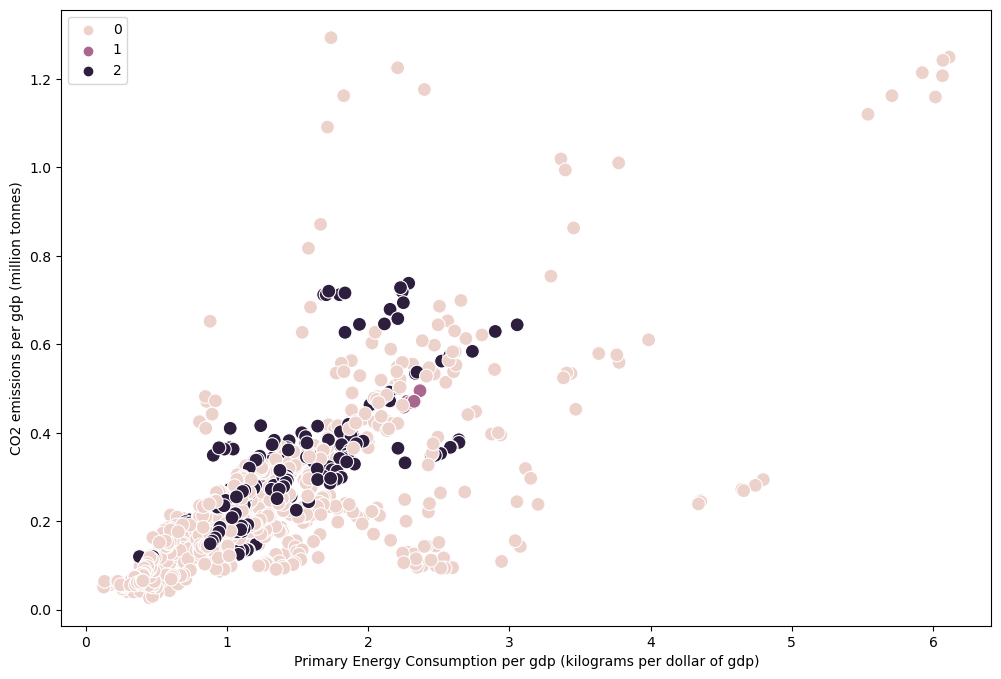

In [32]:
# Create a scatterplot for primary energy consumption per GDP and CO2 emissions per gdp

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_co2_clustering_filter['energy_per_gdp'], y=df_co2_clustering_filter['co2_per_gdp'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Primary Energy Consumption per gdp (kilograms per dollar of gdp)') # Label x-axis.
plt.ylabel('CO2 emissions per gdp (million tonnes)') # Label y-axis.
plt.show()

#### For this plot there is also no clear trend visible for all cluters. The datapoints are all over the place for the light pink cluster. Only for the dark purple cluster the datapoints are aggregated in a certain area, but this is also the cluster with the least values included. For the purple cluster you could conclude that the higher the primary energy consumption per gdp is, the higher the co2 emissions per gdp are.

#### Next, let's try to plot GDP and CO2 emissions together.

## 6.4 GDP and CO2 emissions

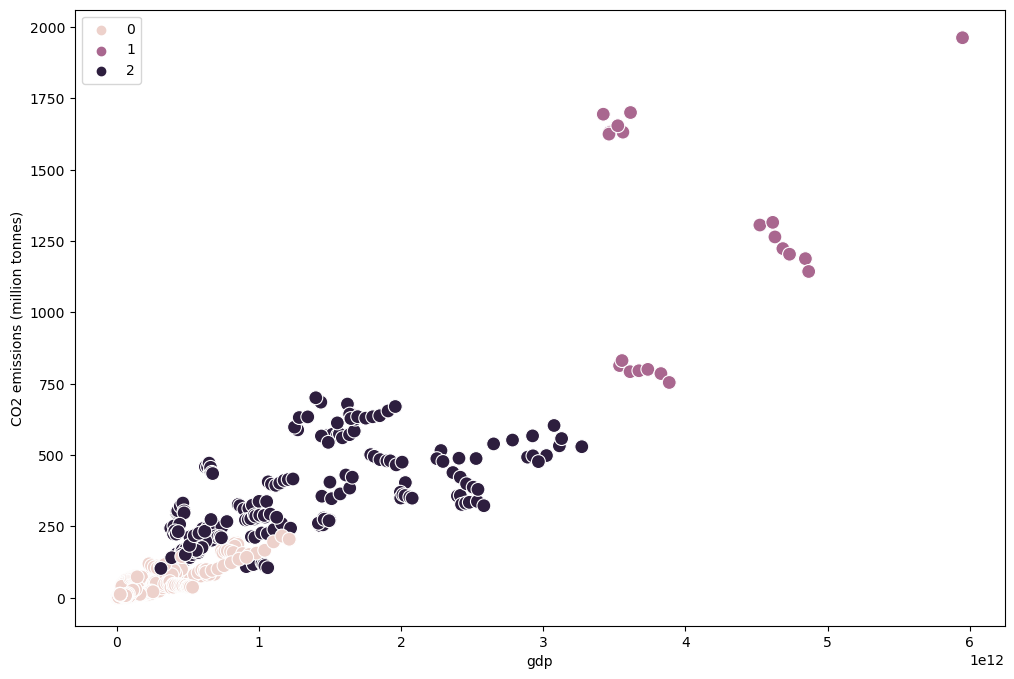

In [33]:
# Create a scatterplot for GDP and CO2 emissions

plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_co2_clustering_filter['gdp'], y=df_co2_clustering_filter['co2'], hue=kmeans.labels_, s=100) 
ax_4.grid(False)
plt.xlabel('gdp')
plt.ylabel('CO2 emissions (million tonnes)')
plt.show()

#### For this plot you can observe the following trends:

* light pink: relatively small values, more clustered around CO2 emissions, more variability in gdp.
* dark purple: high values for both co2 emissions and gdp.
* purple: increasing values for gdp and for CO2 emissions, a little more variability in gdp

#### Let's look into the relationship between population and CO2 emissions next.

## 6.5 Population and CO2 Emissions

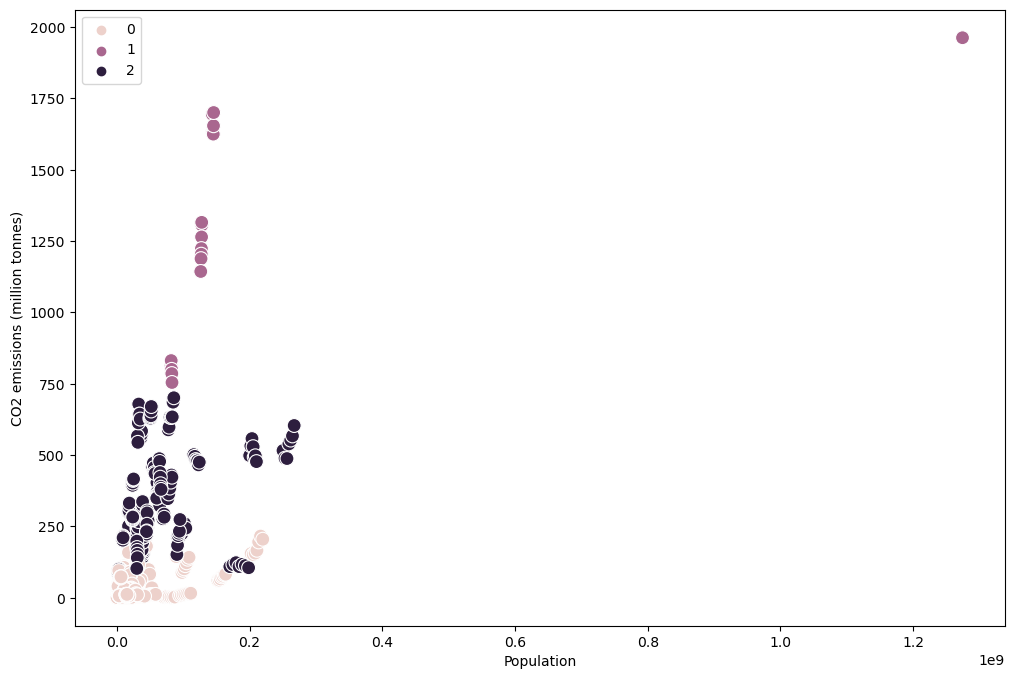

In [34]:
# Create a scatterplot for population and CO2 emissions

plt.figure(figsize=(12,8))
ax_4 = sns.scatterplot(x=df_co2_clustering_filter['population'], y=df_co2_clustering_filter['co2'], hue=kmeans.labels_, s=100) 
ax_4.grid(False)
plt.xlabel('Population')
plt.ylabel('CO2 emissions (million tonnes)')
plt.show()

#### This plot looks very interesting, because the clusters are stacked on each other except for one outlier from the dark purple cluster. All clusters have low values for population, but differ by their values for CO2 emissions:

* light pink cluster: lowest values for CO2 emissions, some variability in population
* purple cluster: medium values for CO2 emissions, some variability in population
* dark purple cluster: higest values for CO2 emissions, least variability in population

#### Based on this I assume that population did not have a huge impact on the clustering process, while CO2 emissions definitely had. If CO2 emissions were a factor so important in clustering our data, it might be interesting to see what happens if we plot together total CO2 emissions and average CO2 emissions.

## 6.6 Average CO2 Emissions and Total CO2 Emissions

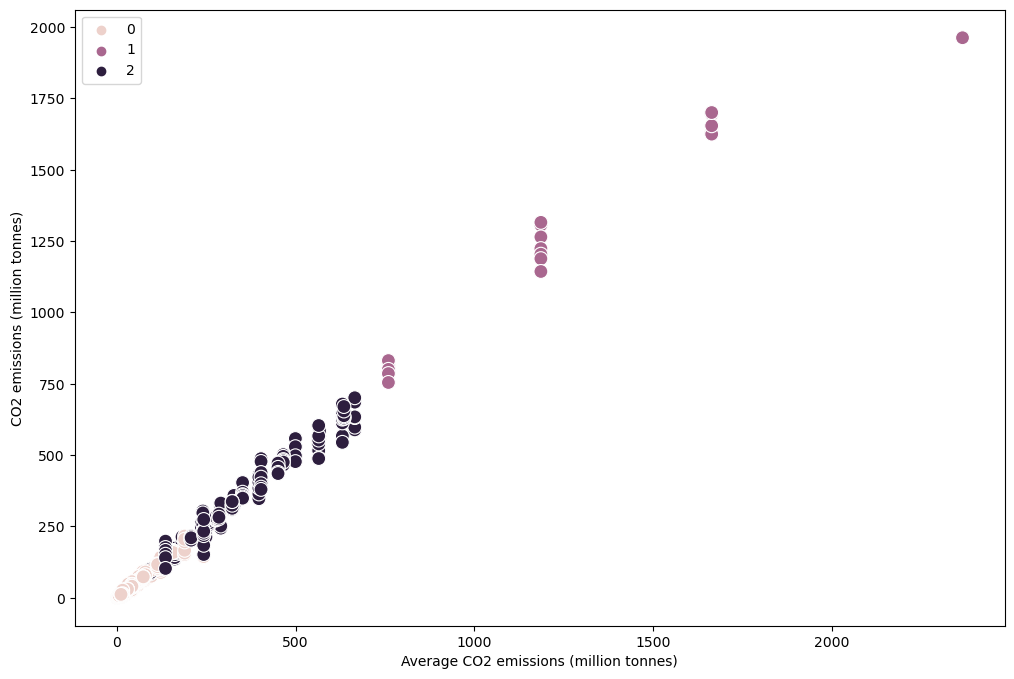

In [35]:
# Create a scatterplot for average CO2 emissions and total CO2 emissions

plt.figure(figsize=(12,8))
ax_5 = sns.scatterplot(x=df_co2_clustering_filter['average_co2_emission'], y=df_co2_clustering_filter['co2'], hue=kmeans.labels_, s=100) 
ax_5.grid(False)
plt.xlabel('Average CO2 emissions (million tonnes)')
plt.ylabel('CO2 emissions (million tonnes)')
plt.show()

#### Looking at this plot you can see that the more the average increases, the more the clusters separate from each other. The dark purple cluster is still on a league of its own because, even on average, the values are out of scale compared to others data points. It's like the 22 observations in the dark purple cluster are too different from any other observations in the entire dataframe. Let's look at another plot, featuring primary energy consumption and population.

## 6.7 Primary Energy Consumption and Population

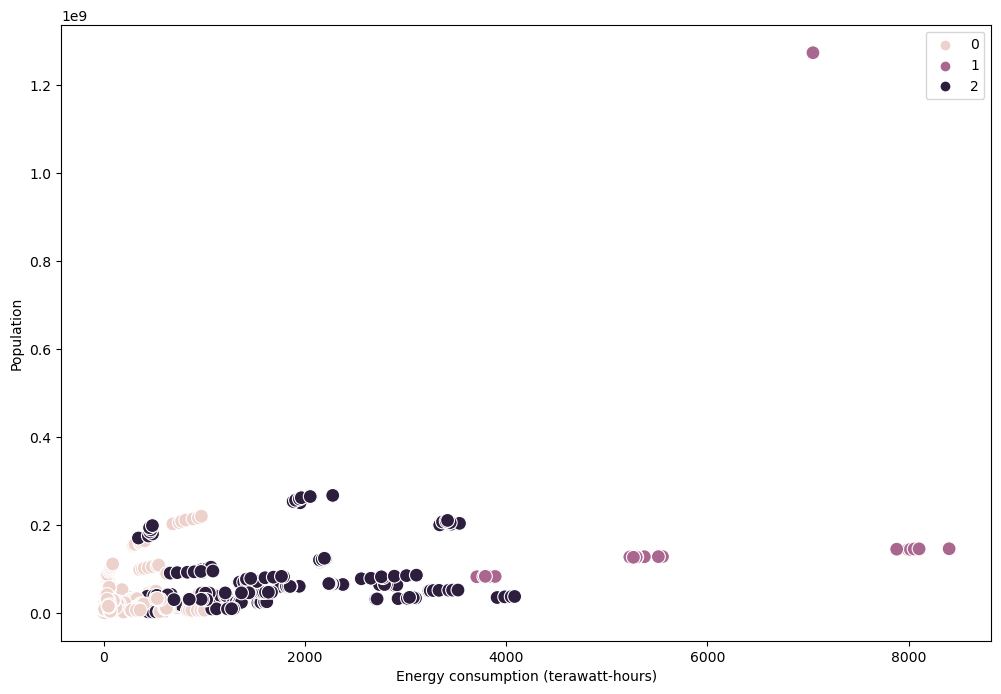

In [36]:
# Create a scatterplot for primary energy consumption and population

plt.figure(figsize=(12,8))
ax_6 = sns.scatterplot(x=df_co2_clustering_filter['primary_energy_consumption'], y=df_co2_clustering_filter['population'], hue=kmeans.labels_, s=100) 
ax_6.grid(False)
plt.xlabel('Energy consumption (terawatt-hours)')
plt.ylabel('Population')
plt.show()

#### Here you can see a clear trend among clusters except for one outlier that belongs to the dark purple cluster.

* Light pink: relatively small values for both population and energy consumption, some variability in energy consumption and in number of population.
* Dark Purple: relatively small values for population with one outlier, medium and high values for energy consumption, 
* Purple: relatively low values for population, but low to medium values for energy consumption

#### Based on this plot, population does not seem to be an important factor. This means that a high population does not necessarily lead to a high energy consumption. Also, a high primary energy consumption does not necessarily appear together with a high population.

#### Let's check out the descriptive statistics of our clusters to gain more insights on this clustering analysis.

# 7. Descriptive Statistics

#### First of all, let's create a new column and assign a color to every cluster number.

In [37]:
# Rename the clusters into colors

df_co2_clustering_filter.loc[df_co2_clustering_filter['cluster_number'] == 0, 'cluster_name'] = 'Light pink'
df_co2_clustering_filter.loc[df_co2_clustering_filter['cluster_number'] == 1, 'cluster_name'] = 'Purple'
df_co2_clustering_filter.loc[df_co2_clustering_filter['cluster_number'] == 2, 'cluster_name'] = 'Dark Purple'

C:\Users\osoty\AppData\Local\Temp\ipykernel_16948\3121958177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_co2_clustering_filter.loc[df_co2_clustering_filter['cluster_number'] == 0, 'cluster_name'] = 'Light pink'


In [38]:
# Calculate descriptive statistics for the variables of interest

df_co2_clustering_filter.groupby('cluster_name').agg({'population':['mean', 'median'],
                                               'gdp':['mean', 'median'],
                                               'co2':['mean', 'median'],
                                               'co2_per_capita':['mean', 'median'],
                                               'co2_per_gdp': ['mean', 'median'],
                                               'energy_per_capita': ['mean', 'median'],
                                               'energy_per_gdp': ['mean', 'median'],
                                               'primary_energy_consumption' : ['mean', 'median'],
                                               'average_co2_emission': ['mean', 'median']})

population                        gdp                \
                      mean       median          mean        median   
cluster_name                                                          
Dark Purple   6.767687e+07   46792044.0  1.262615e+12  1.058644e+12   
Light pink    1.576861e+07    7464882.0  1.327088e+11  5.670821e+10   
Purple        1.705647e+08  127363832.0  4.053865e+12  3.703986e+12   

                      co2           co2_per_capita         co2_per_gdp         \
                     mean    median           mean  median        mean median   
cluster_name                                                                    
Dark Purple    346.270569   320.791       9.072410  5.9580    0.321682  0.296   
Light pink      27.065008    10.474       3.719149  1.9170    0.234933  0.190   
Purple        1261.324045  1244.009       9.878455  9.9485    0.317636  0.267   

             energy_per_capita             energy_per_gdp         \
                          mean      median           mean median   
cluster_name                                                       
Dark Purple       44554.620344  31661.1700       1.443118  1.370   
Light pink        22486.925409  10549.0060       1.248438  1.067   
Purple            46168.474727  46084.9315       1.479636  1.145   

             primary_energy_consumption            average_co2_emission  \
                                   mean     median                 mean   
cluster_name                                                              
Dark Purple                 1677.914605  1429.0050           345.461561   
Light pink                   150.642023    65.1070            27.421881   
Purple                      5807.074455  5334.5895          1256.034218   

                         
                 median  
cluster_name             
Dark Purple    322.2916  
Light pink      11.2069  
Purple        1186.1066

Judging from the descriptive statistics, all variables somewhat played a role in the clustering process.

Dark purple, on average, has the highest values in most categories (only exceptions are co2 per gdp and energy per gdp).
This makes sense since the dark purple cluster contains the least values (only 22) and pretty much represents the outliers which are left after removing the highest extreme values. 

The mean and medians for the purple cluster are lower than for the dark purple cluster, but this cluster has the highest values for co2 per gdp and energy per gdp. 

The mean and medians for the light pink cluster are the lowest for all categories. This cluster contains the biggest part of the observations with 914 records.

Together the purple and the light pink cluster make up 98% of our observations (respectively 914 and 192 count of values) and therefore better represent the dataset. 


Based on this, the clustering gave us an overview of what we already noticed in our previous analysis:


The majority of values recorded in countries are similar to each other (with small differences, as seen in the light pink and purple clusters).

On the other hand, there are countries such as China, the United States and India that have higher values than all others, with higher population, GDP, CO2 emissions, Primary Energy consumption and so on.

According to the clustering analysis it might be better to conduct further analysis separately:
* On one side, we have basically China, United States and India
* On the other side, all the other countries.